In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats


In [3]:
df = pd.read_csv('train_sample.csv')

/Users/stephaniechew/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997324 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   fecha_dato                997324 non-null  object 
 1   customer_code             997324 non-null  int64  
 2   employee_index            997324 non-null  object 
 3   country_residence         997324 non-null  object 
 4   gender                    997320 non-null  object 
 5   age                       997324 non-null  int64  
 6   account_open_date         997324 non-null  object 
 7   new_customer              997324 non-null  int64  
 8   account_opened_by_months  997324 non-null  int64  
 9   indrel                    997324 non-null  float64
 10  ult_fec_cli_1t            1747 non-null    object 
 11  customer_type             988433 non-null  object 
 12  customer_relation_type    988433 non-null  object 
 13  indresi                   997324 non-null  o

In [3]:
df.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-05-28,1476473,N,ES,H,28,2015-10-10,0.0,7,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-07-28,1026277,N,ES,H,23,2012-07-19,0.0,36,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-04-28,1245637,N,ES,V,35,2014-02-26,0.0,17,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-11-28,43123,N,ES,V,49,1996-07-11,0.0,232,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-09-28,1381838,N,ES,H,28,2015-02-10,0.0,7,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-07-28,1252662,N,ES,V,31,2014-04-08,0.0,18,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-10-28,1275906,N,ES,H,21,2014-07-23,0.0,15,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2016-02-28,49769,N,ES,V,59,1996-12-05,0.0,230,1.0,...,0,0,0,1,0,0,0,0.0,0.0,1
8,2015-06-28,483973,N,ES,H,86,2008-10-28,0.0,81,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2016-02-28,407455,N,ES,V,37,2003-02-17,0.0,156,1.0,...,0,0,0,0,0,1,0,1.0,1.0,1


# Digital Banking - Why it's important for banks during COVID-19

# Customer acquisition: Checking Account Promotion Report
## New customers vs Existing customers
## Younger generation vs Older generation

# Translation Notes
Particulares = Personal

varon for male

hembra for female

# Cleaning data

In [5]:
df.loc[df['age'] == ' NA']

df['age'] = pd.to_numeric(df['age'],errors='coerce')

df.dropna(subset=['age'],inplace=True)

In [6]:
df.rename(columns={'sexo': 'gender', 'ind_ctop_fin_ult1': 'personal_accounts', 'ind_nuevo': 'new_customer','ind_cco_fin_ult1': 'current_accounts'}, inplace=True)
#df['personal_accounts']

df.rename(columns={'ind_ahor_fin_ult1': 'savings_account'}, inplace=True)

df.rename(columns={'ind_ctju_fin_ult1': 'junior_account'}, inplace=True)

df.rename(columns={'ind_tjcr_fin_ult1': 'credit_cards'}, inplace=True)

df.rename(columns={'pais_residencia': 'country_residence'}, inplace=True)

In [7]:
df.rename(columns={'indrel_1mes': 'customer_type', 'tiprel_1mes': 'customer_relation_type', 'ind_actividad_cliente': 'active_customer', 'segmento': 'segmentation', 'fecha_alta': 'account_open_date'}, inplace=True)
df.rename(columns={'ncodpers': 'customer_code'}, inplace=True)

df.rename(columns={'ind_empleado': 'employee_index'},inplace=True)


df.head(5)




,fecha_dato,customer_code,employee_index,country_residence,gender,age,account_open_date,new_customer,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,credit_cards,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-05-28,1476473,N,ES,H,28.0,2015-10-10,0.0,7,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-07-28,1026277,N,ES,H,23.0,2012-07-19,0.0,36,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-04-28,1245637,N,ES,V,35.0,2014-02-26,0.0,17,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-11-28,43123,N,ES,V,49.0,1996-07-11,0.0,232,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-09-28,1381838,N,ES,H,28.0,2015-02-10,0.0,7,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
df.rename(columns={'ind_deco_fin_ult1': 'short_term_accounts', 'ind_deme_fin_ult1': 'medium_term_accounts', 'ind_dela_fin_ult1': 'long_term_accounts'}, inplace=True)
df.rename(columns={'antiguedad': 'account_opened_by_months'},inplace=True)
#df.loc[df['customer_code']==190483, 24:]


In [9]:
df['account_opened_by_months'] = pd.to_numeric(df['account_opened_by_months'],errors='coerce')



In [10]:
df['new_customer'] = pd.to_numeric(df['new_customer'],errors='coerce')
df['new_customer'] = df['new_customer'].astype(int)

In [186]:
new_customers = df['new_customer'] == 1
current_customers = df['new_customer'] ==0

savings = df['savings_account']==1
checking = df['current_accounts'] == 1
online_banking = df['e-accounts'] ==1
young = (df_selected['age'] >= 16) & (df_selected['age'] <=35)
middle = (df_selected['age']>=36) & (df_selected['age']<= 65) 
old = (df_selected['age']>=66) & (df_selected['age']<=100)

df.loc[current_customers & checking]

,fecha_dato,customer_code,employee_index,country_residence,gender,age,account_open_date,new_customer,account_opened_by_months,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,credit_cards,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-05-28,1476473,N,ES,F,28,2015-10-10,0,7,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-07-28,1026277,N,ES,F,23,2012-07-19,0,36,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-04-28,1245637,N,ES,M,35,2014-02-26,0,17,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-07-28,1252662,N,ES,M,31,2014-04-08,0,18,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-10-28,1275906,N,ES,F,21,2014-07-23,0,15,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,2015-04-28,292446,N,ES,M,52,2001-11-07,0,164,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999996,2015-06-28,575006,N,ES,M,70,2005-10-27,0,117,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,2015-08-28,1244177,N,ES,M,29,2014-02-18,0,18,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999998,2015-10-28,343133,N,ES,F,84,2002-03-16,0,163,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [18]:
#gender_grouped = df.groupby(['sexo'])
#gender_grouped.count()

df['gender'] = df['gender'].replace(['V', 'H'], ['M', 'F'])
df.rename(columns={'indrel_1mes': 'customer_type', 'ind_nuevo': 'new_customer', 'ind_ecue_fin_ult1': 'e-accounts'}, inplace=True)

df['age'] = df['age'].astype(int)

df.head(5)

/Users/stephaniechew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/stephaniechew/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/stephaniechew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,fecha_dato,customer_code,employee_index,country_residence,gender,age,account_open_date,new_customer,account_opened_by_months,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,credit_cards,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-05-28,1476473,N,ES,F,28,2015-10-10,0,7,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-07-28,1026277,N,ES,F,23,2012-07-19,0,36,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-04-28,1245637,N,ES,M,35,2014-02-26,0,17,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-11-28,43123,N,ES,M,49,1996-07-11,0,232,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-09-28,1381838,N,ES,F,28,2015-02-10,0,7,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [149]:



df_selected = df[['fecha_dato','customer_code','gender', 'age', 'account_open_date', 'new_customer', 'account_opened_by_months', 'current_accounts', 'active_customer', 'junior_account', 'e-accounts', 'personal_accounts', 'credit_cards', 'short_term_accounts', 'medium_term_accounts', 'long_term_accounts']]
df_selected.loc[df['customer_code']==1233624].sort_values('fecha_dato')
df_selected.index

#df_selected['fecha_dato'].value_counts()

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            999990, 999991, 999992, 999993, 999994, 999995, 999996, 999997,
            999998, 999999],
           dtype='int64', length=997324)

In [51]:
df_selected = df_selected.sort_values('fecha_dato').drop_duplicates('customer_code',keep='last')
df_selected['customer_code'].value_counts()

df_selected.loc[df_selected['customer_code']==190483]


,fecha_dato,customer_code,gender,age,account_open_date,new_customer,account_opened_by_months,current_accounts,active_customer,junior_account,e-accounts,personal_accounts,credit_cards,short_term_accounts,medium_term_accounts,long_term_accounts
945698,2016-03-28,190483,F,44,2000-09-05,0,186,0,0.0,0,0,1,0,0,0,0


In [9]:
df['customer_code'].value_counts().head(15)

496033     8
945227     8
653838     8
1007797    8
1233624    8
190483     8
1370028    8
1064316    8
721290     8
1182711    8
672814     7
392860     7
55527      7
94352      7
1362712    7
Name: customer_code, dtype: int64

In [19]:
df_selected['account_opened_by_months'].value_counts()
longevity = df_selected.groupby(['account_opened_by_months'])

short_longevity = df_selected['account_opened_by_months']<12
two_years = df_selected['account_opened_by_months'] <24

df_selected.loc[two_years & new_customers & checking]

,fecha_dato,customer_code,gender,age,account_open_date,new_customer,account_opened_by_months,current_accounts,active_customer,junior_account,e-accounts,personal_accounts,credit_cards,short_term_accounts,medium_term_accounts,long_term_accounts
30,2015-09-28,1426117,M,40,2015-08-03,1,1,1,1.0,0,0,0,0,0,0,0
36,2016-04-28,1535423,F,20,2016-02-29,1,2,1,1.0,0,0,0,0,0,0,0
39,2016-05-28,1532160,M,39,2016-02-14,1,3,1,1.0,0,0,0,0,0,0,0
68,2015-09-28,1431495,F,20,2015-08-07,1,1,1,0.0,0,0,0,0,0,0,0
78,2015-12-28,1515205,M,45,2015-12-10,1,0,1,1.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999914,2016-03-28,1478901,F,30,2015-10-14,1,5,1,1.0,0,0,0,0,0,0,0
999950,2015-10-28,1472286,M,20,2015-10-07,1,0,1,0.0,0,0,0,0,0,0,0
999951,2015-11-28,1460839,M,25,2015-09-25,1,2,1,0.0,0,0,0,0,0,0,0
999967,2015-10-28,1423792,M,22,2015-08-01,1,2,1,0.0,0,0,0,0,0,0,0


In [19]:
customers = df['employee_index'] == 'N'
df = df[customers]
df[new_customers]

,fecha_dato,customer_code,employee_index,country_residence,gender,age,account_open_date,new_customer,account_opened_by_months,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,credit_cards,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13,2015-12-28,59915,N,ES,M,44,1997-03-15,1,5,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
30,2015-09-28,1426117,N,ES,M,40,2015-08-03,1,1,1.0,...,0,0,0,0,0,1,0,0.0,0.0,1
36,2016-04-28,1535423,N,ES,F,20,2016-02-29,1,2,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
39,2016-05-28,1532160,N,ES,M,39,2016-02-14,1,3,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
68,2015-09-28,1431495,N,ES,F,20,2015-08-07,1,1,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999950,2015-10-28,1472286,N,ES,M,20,2015-10-07,1,0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999951,2015-11-28,1460839,N,ES,M,25,2015-09-25,1,2,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999967,2015-10-28,1423792,N,ES,M,22,2015-08-01,1,2,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999979,2015-09-28,1400502,N,ES,M,62,2015-06-05,1,3,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


# Null Hypothesis: The number of new customers who opened a checking account and is the same as number as existing customers

# Alternative Hypothesis: The number of new customers is different from existing customers.

In [18]:
age_grouped = df.groupby(['age'])


df['e-accounts'].value_counts()

print(df['current_accounts'][new_customers].count().mean())
print(df['current_accounts'][current_customers].count().mean())
print(df['new_customer'].std())

df.describe()
df.loc[new_customers & young]
print(f'Average younger generation age: {df[new_customers][young]["age"].mean()}')
print(f'Average older generation age: {df[new_customers][old]["age"].mean()}')

new_customers_grouped = df.groupby('new_customer')
new_customers_grouped.count()

59534.0
937790.0
0.23691866554347946


/Users/stephaniechew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Users/stephaniechew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Average younger generation age: 23.122635311176058
Average older generation age: 48.662422864566416


,fecha_dato,customer_code,employee_index,country_residence,gender,age,account_open_date,account_opened_by_months,indrel,ult_fec_cli_1t,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,credit_cards,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
new_customer,,,,,,,,,,,,,,,,,,,,,
0.0,937790,937790,937790,937790,937787,937790,937790,937790,937790,1001,...,937790,937790,937790,937790,937790,937790,937790,937785,937785,937790
1.0,59534,59534,59534,59534,59533,59534,59534,59534,59534,746,...,59534,59534,59534,59534,59534,59534,59534,59527,59527,59534


In [158]:
checking1 = df_selected['current_accounts']==1
oct_2014 = df_selected['account_open_date'] <= '2014-11'
sept_2014 = df_selected['account_open_date'] > '2014-09'

df_selected['account_open_date'][checking1].value_counts()
#df_selected.loc[(df_selected['account_open_date'] <='2014') & (df_selected['new_customer']==1)]

df_selected.loc[(df_selected['account_open_date']>= '2015-10-01') & (df_selected['account_open_date']<='2015-10-31') & new_customers1]





,fecha_dato,customer_code,gender,age,account_open_date,new_customer,account_opened_by_months,current_accounts,active_customer,junior_account,e-accounts,personal_accounts,credit_cards,short_term_accounts,medium_term_accounts,long_term_accounts
385,2015-10-28,1468655,F,33,2015-10-04,1,0,0,0.0,0,0,0,0,0,0,0
561,2016-01-28,1489785,F,20,2015-10-26,1,3,0,0.0,0,0,0,0,0,0,0
567,2016-03-28,1471700,M,20,2015-10-07,1,5,0,0.0,0,0,0,0,0,0,0
676,2015-10-28,1477044,M,30,2015-10-11,1,0,1,1.0,0,0,0,0,0,0,0
757,2015-12-28,1468701,F,20,2015-10-05,1,2,1,1.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999585,2015-12-28,1471126,M,53,2015-10-06,1,2,0,0.0,0,0,0,0,0,0,0
999691,2016-03-28,1470354,F,20,2015-10-06,1,5,1,0.0,0,0,0,0,0,0,0
999752,2015-12-28,1494686,F,20,2015-10-30,1,2,0,0.0,0,0,0,0,0,0,0
999914,2016-03-28,1478901,F,30,2015-10-14,1,5,1,1.0,0,0,0,0,0,0,0


In [162]:
new_customers1 = df_selected['new_customer']==1


In [160]:
df[new_customers]['current_accounts']


13        0
30        1
36        1
39        1
68        1
         ..
999950    1
999951    1
999967    1
999979    1
999995    0
Name: current_accounts, Length: 59534, dtype: int64

In [191]:


stats.ttest_ind(df_selected[new_customers1][young]['age'], df_selected[~new_customers1][middle]['age'], equal_var=False)


#stats.ttest_ind(df_selected[young]['current_accounts'], df_selected[old]['current_accounts'], equal_var=False)
#len(df_selected),len(new_customers1)

# df_selected.info()

#print(df_selected[new_customers1]['age'].std(), df_selected[~new_customers1]['age'].std())
#print(df_selected[young]['current_accounts'].std(), df_selected[old]['current_accounts'].std())

#Reject the null

/Users/stephaniechew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Ttest_indResult(statistic=-1025.967531971121, pvalue=0.0)

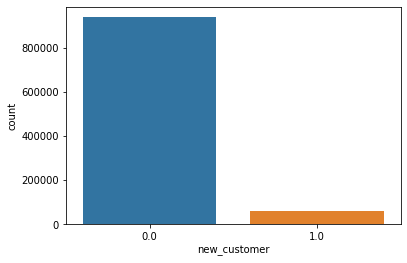

In [63]:
sns.countplot(x='new_customer', data=df)
#More existing customers than new customers.

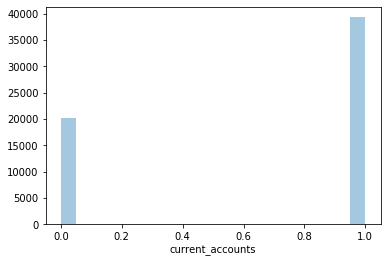

In [197]:
sns.distplot(df_selected[new_customers]['current_accounts'], kde=False)

# Analyze the age between new and existing customers

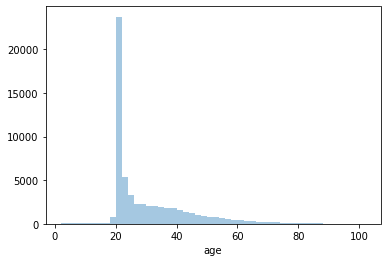

In [56]:
sns.distplot(df[new_customers]['age'], kde=False)

#Higher average number of new customers in the 20s.

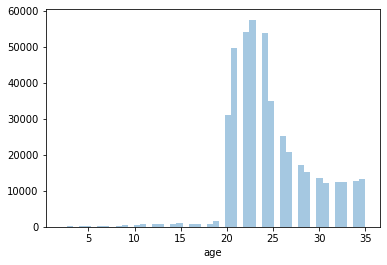

In [134]:
#stats.ttest_ind(df['new_customer'][young], df['new_customer'][old], equal_var=False)

sns.distplot(df['age'][young], kde=False)

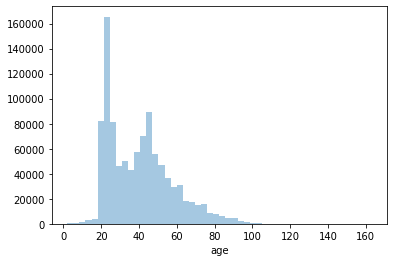

In [57]:
#sns.lineplot(x='new_customer', y='age', data=df)
#print(df['new_customer'][young].mean())
#print(df['new_customer'][old].mean())
sns.distplot(df['age'], kde=False)

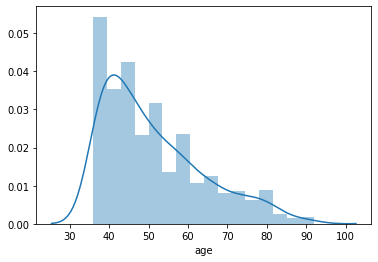

In [143]:
sns.distplot(df[old & new_customers & online_banking]['age'])

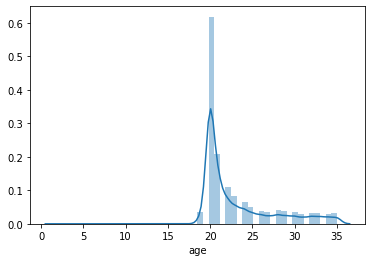

In [115]:
#sns.distplot(df[old]['age'][new_customers], kde=False)
credit_cards = df['credit_cards'] == 1
sns.distplot(df[young & new_customers & checking]['age'])

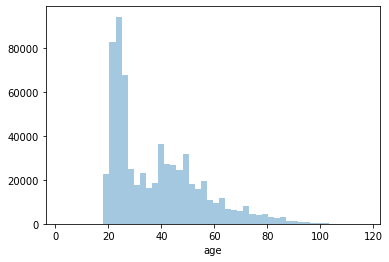

In [61]:
sns.distplot(df['age'][checking], kde=False)

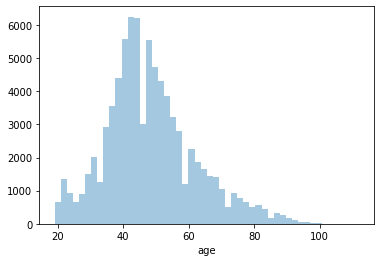

In [145]:
sns.distplot(df['age'][online_banking],kde=False)

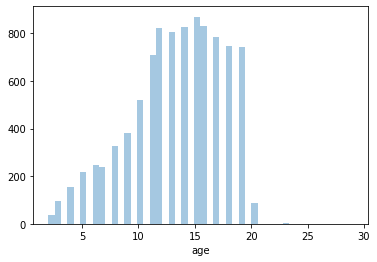

In [66]:
juniors = df['junior_account'] == 1
sns.distplot(df['age'][juniors], kde=False)

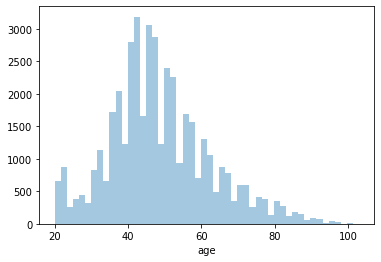

In [146]:
sns.distplot(df[checking & online_banking]['age'], kde=False)

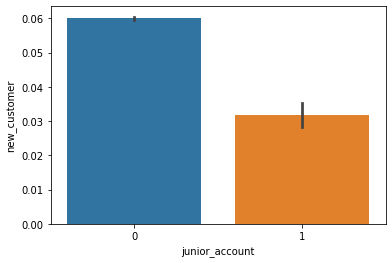

In [152]:
sns.barplot(x='junior_account', y='new_customer', data=df)

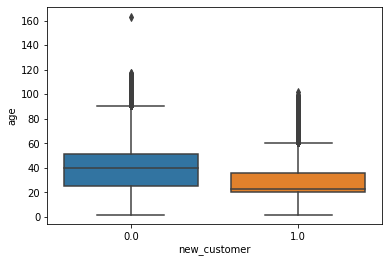

In [174]:
sns.boxplot(x='new_customer', y='age', data=df)

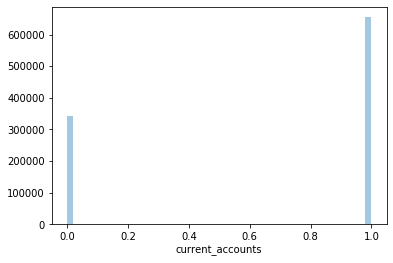

In [138]:
sns.distplot(df['current_accounts'], kde=False)

In [58]:
#sns.distplot(df_selected['account_opened_by_months'][current_customers][checking], kde=False)

# df_selected.loc[df_selected['account_opened_by_months']==12]
df_selected.loc[(df_selected['new_customer']==0)&(df_selected['account_opened_by_months']==33) &(df_selected['current_accounts']==1),['customer_code', 'account_open_date', 'new_customer','current_accounts']]
#df_selected['account_opened_by_months'].value_counts().sort_values()



,customer_code,account_open_date,new_customer,current_accounts
637399,1087463,2012-10-24,0,1
90627,1072179,2012-10-02,0,1
990908,1081216,2012-10-16,0,1
499814,1086438,2012-10-23,0,1
630668,1075554,2012-10-04,0,1
...,...,...,...,...
103951,1155018,2013-08-03,0,1
103858,1153566,2013-08-01,0,1
114527,1158669,2013-08-07,0,1
105336,1165543,2013-08-13,0,1


In [208]:
df_selected.to_csv('Santander_sample1.csv')